In [1]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
iris = load_iris()
data = pd.DataFrame(iris.data, columns=iris.feature_names)
labels = pd.DataFrame(iris.target, columns=['labels'])

In [3]:
print(len(data))
print(len(labels))

150
150


In [4]:
data = pd.concat([data, labels], axis=1)
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),labels
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [5]:
# DBSCAN
# eps : 앱실론(군집의 반경), min_samples : 군집 안 최소 데이터 수
dbscan = DBSCAN(eps=0.5, min_samples=5)
pred = pd.DataFrame(dbscan.fit_predict(data))
pred.columns = ['predict']
pred

,predict
0,0
1,0
2,0
3,0
4,0
...,...
145,2
146,2
147,2
148,2


In [6]:
r = pd.concat([data, pred], axis=1)
r.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),labels,predict
0,5.1,3.5,1.4,0.2,0,0
1,4.9,3.0,1.4,0.2,0,0
2,4.7,3.2,1.3,0.2,0,0
3,4.6,3.1,1.5,0.2,0,0
4,5.0,3.6,1.4,0.2,0,0


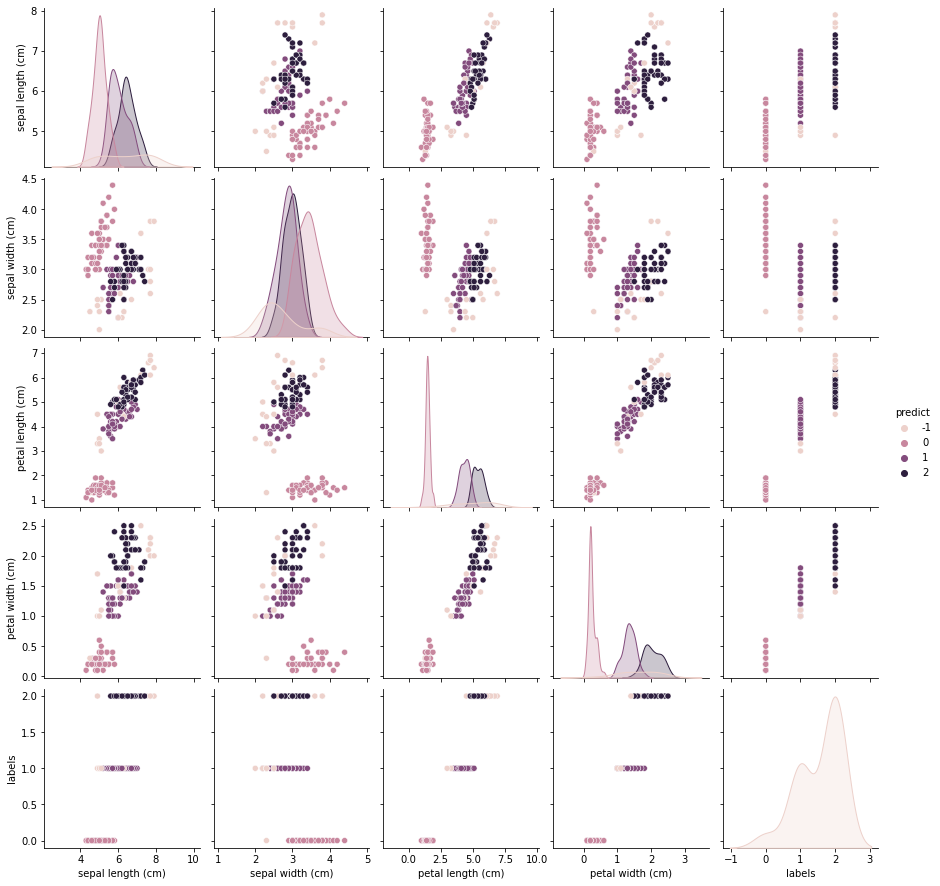

In [7]:
# 예측값 pair plot
sns.pairplot(r, hue='predict')

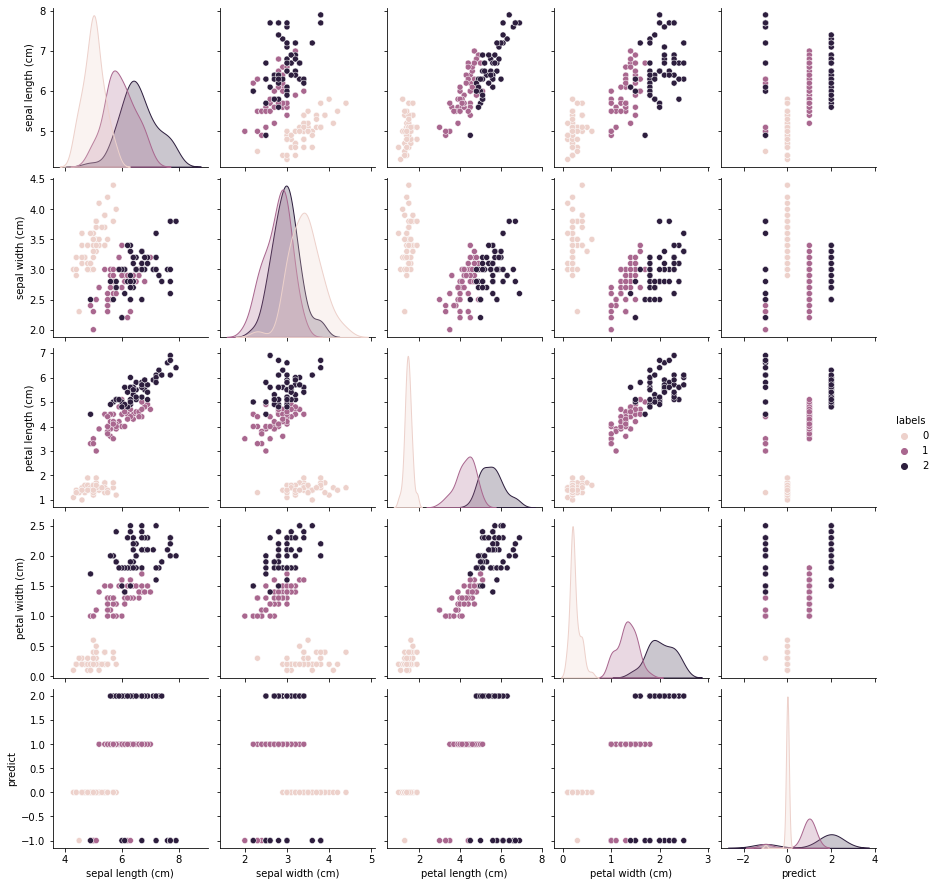

In [8]:
# 실측값 pair plot
sns.pairplot(r, hue='labels')

### KMEANS

In [9]:
#KM학습
km = KMeans(n_clusters=3, random_state=21)
km.fit(data)

KMeans(n_clusters=3, random_state=21)

In [10]:
#예측값 DF생성
new_labels= pd.DataFrame(km.labels_)
new_labels.columns = ['predict']

In [11]:
new_labels.tail()

,predict
145,2
146,2
147,2
148,2
149,2


In [12]:
r2 = pd.concat([data, new_labels], axis=1)

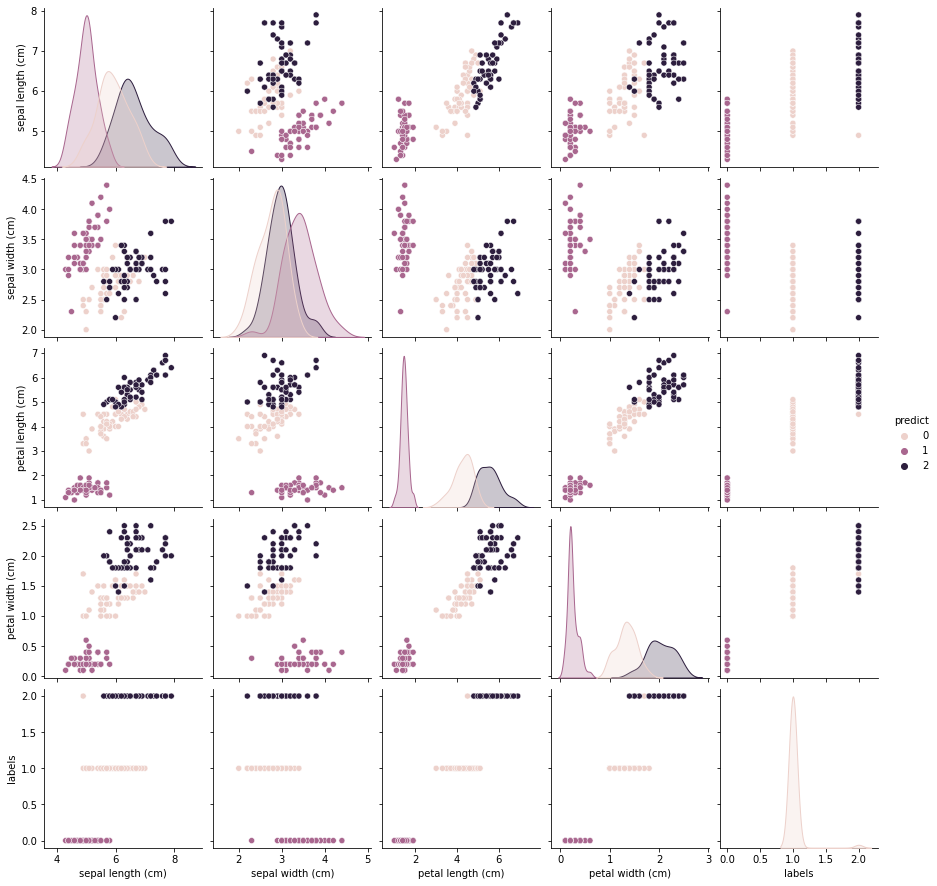

In [13]:
sns.pairplot(r2,hue='predict')
plt.show()

- pairplot 을 봤을 때 iris 데이터에서는 K-Means가 DBscan보다 군집 분석을 실제값과 비슷하게 분석함.
- 아이리스 데이터에 한정해서 K-means 성능이 더 좋다
- 지도학습 모델처럼 군집분석모델도 항상 가장 좋은 모델은 없다.
- 각각의 데이터 특성에 맞춰 모델을 사용해야 한다.